In [7]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from matplotlib.ticker import LogLocator, NullFormatter
from matplotlib import rc
from pathlib import Path
import numpy as np

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.size': 9,
    'text.usetex': True,

    'axes.labelsize': 9,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'xtick.direction': 'inout',
    'ytick.direction': 'inout',
    'axes.axisbelow': True,
    'axes.linewidth': 0.5,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
    'xtick.minor.size': 3,
    'ytick.minor.size': 3,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    
    
    'lines.markeredgewidth': 0.5,
    'lines.linewidth': 0.7,  
    'xtick.top': True,
    'xtick.labeltop': False,
    'xtick.bottom': True,
    'xtick.labelbottom': True,   
    
    'ytick.right': True,
    'ytick.labelleft': False,
    'ytick.left': True,
    'ytick.labelright': True,  
    

    'legend.fontsize': 8,
    'legend.handlelength': 0.8,
    'legend.borderpad': 0.4,
    'legend.borderaxespad': 0.1,
    'legend.handletextpad': 0.3,
    'legend.labelspacing': 0.2,

    'lines.linewidth': 0.8,
    
    'grid.linewidth': 0.5
})

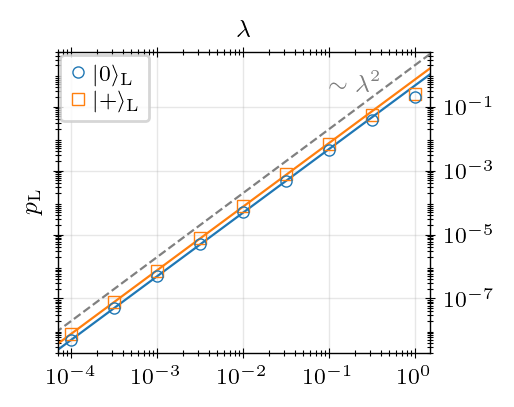

Saved figure to ../../figs/logical_error_rates_plot.pdf


In [8]:
# Set the directory that contains the CSV files
DATA_DIR = Path('../data/Fig4')


def prepare_logical_error_rates(filename: str, expectation_col: str):
    df = pd.read_csv(DATA_DIR / filename, sep=';')
    df = df[(df[['err_2q_nn', 'err_2q_nnn', 'err_3q']] > 0).any(axis=1)].reset_index(drop=True)
    # Sort so the smallest lambda pairs with the smallest err_2q_nn
    df = df.sort_values('err_2q_nn', ascending=False).reset_index(drop=True)
    lambdas = 10.0 ** (-np.arange(len(df), dtype=float)/2)
    logical_error_rates = (1 - df[expectation_col].to_numpy()) / 2
    return lambdas, logical_error_rates


lambda_zero, logical_errors_zero = prepare_logical_error_rates('logical_error_rates_0.csv', 'Z_L')
lambda_plus, logical_errors_plus = prepare_logical_error_rates('logical_error_rates_+.csv', 'X_L')

fig, ax = plt.subplots(figsize=(2.4, 1.95))
lam_min = min(lambda_zero.min(), lambda_plus.min())*0.5
lam_max = max(lambda_zero.max(), lambda_plus.max())*1.5
ax.loglog([lam_min, lam_max], [10**0.3*lam_min**2, 10**0.3*lam_max**2], '--', color='gray')
ax.text(0.1, 0.3, r'$\sim\lambda^2$', color='gray', fontsize=9, ha='left')

if len(lambda_zero):
    ax.loglog(lambda_zero, logical_errors_zero, marker='o', markersize = 4, fillstyle = 'none', linestyle='none', label=r'$|0\rangle_\mathrm{L}$', zorder=3)
if len(lambda_plus):
    ax.loglog(lambda_plus, logical_errors_plus, marker='s', markersize = 4, fillstyle = 'none', linestyle='none', label=r'$|+\rangle_\mathrm{L}$', zorder=2)
   

# Exclude the first two points
lambda_zero_fit = lambda_zero[2:]
lambda_plus_fit = lambda_plus[2:]
logical_errors_zero_fit = logical_errors_zero[2:]
logical_errors_plus_fit = logical_errors_plus[2:]

deg = 1 

log_lambda_zero = np.log10(lambda_zero_fit)
log_lambda_plus = np.log10(lambda_plus_fit)

log_p_zero = np.log10(logical_errors_zero_fit)
log_p_plus = np.log10(logical_errors_plus_fit)

coeff_zero = np.polyfit(log_lambda_zero, log_p_zero, deg)
coeff_plus = np.polyfit(log_lambda_plus, log_p_plus, deg)

x_fit = np.logspace(np.log10(0.7e-4), np.log10(1.5), 200)

y_fit_zero = 10**np.polyval(coeff_zero, np.log10(x_fit))
y_fit_plus = 10**np.polyval(coeff_plus, np.log10(x_fit))

ax.loglog(x_fit, y_fit_zero, '-', linewidth=0.8, zorder = 1, color='C0')
ax.loglog(x_fit, y_fit_plus, '-', linewidth=0.8, zorder = 1, color='C1')


ax.xaxis.set_minor_locator(LogLocator(base=10, subs=np.arange(2,10)*0.1, numticks=1000))
ax.yaxis.set_minor_locator(LogLocator(base=10, subs=np.arange(2,10)*0.1, numticks=1000))

ax.xaxis.set_minor_formatter(NullFormatter())
ax.yaxis.set_minor_formatter(NullFormatter())

ax.tick_params(which='minor', length=2, width=0.4)
ax.tick_params(which='major', length=3.5, width=0.4)

ax.xaxis.set_label_position('top')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$p_\mathrm{L}$')
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.legend()
ax.set_xlim(0.7*1e-4, 1.5)
ax.set_ylim(0.2*1e-8, 5)

plt.show()


out_dir = Path('../../figs')
out_dir.mkdir(parents=True, exist_ok=True)
out_path = out_dir / 'logical_error_rates_plot.svg'
fig.savefig(out_path, format='svg', dpi=300, bbox_inches='tight', transparent=True)

out_path = out_dir / 'logical_error_rates_plot.pdf'
fig.savefig(out_path, format='pdf', dpi=300, bbox_inches='tight', transparent=True)

print(f"Saved figure to {out_path}")
